# Examples

## Generating representations using the ``Compound`` class

The following example demonstrates how to generate a representation via
the ``qml.data.Compound`` class.

In [ ]:
from qml.data import Compound

# Read in an xyz or cif file.
water = Compound(xyz="water.xyz")

# Generate a molecular coulomb matrices sorted by row norm.
water.generate_coulomb_matrix(size=5, sorting="row-norm")

print(water.representation)

Might print the following representation:

In [ ]:
    [ 73.51669472   8.3593106    0.5          8.35237809   0.66066557   0.5
       0.           0.           0.           0.           0.           0.           0.
       0.           0.        ]

## Generating representations via the ``qml.representations`` module

Generating the Coulomb-matrix for water:

In [ ]:
import numpy as np
from qml.representations import *

# Dummy coordinates for a water molecule
coordinates = np.array([[1.464, 0.707, 1.056],
                        [0.878, 1.218, 0.498],
                        [2.319, 1.126, 0.952]])

# Oxygen, Hydrogen, Hydrogen
nuclear_charges = np.array([8, 1, 1])

# Generate a molecular coulomb matrices sorted by row norm.
cm1 = generate_coulomb_matrix(nuclear_charges, coordinates,
                                size=5, sorting="row-norm")
print(cm1)

Generating all atomic coulomb matrices sorted by distance to query atom:

In [ ]:
cm2 = generate_atomic_coulomb_matrix(nuclear_charges, coordinates, size=5, sorting="distance")
print(cm2)

## Calculating a Gaussian kernel
The input for most of the kernels in QML is a numpy array, where the first dimension is the number of representations, and the second dimension is the size of each representation. An brief example is presented here, where ``compounds`` is a list of ``Compound()`` objects:


In [ ]:
import numpy as np
from qml.kernels import gaussian_kernel

# Generate a numpy-array of the representation
X = np.array([c.representation for c in compounds])

# Kernel-width
sigma = 100.0

# Calculate the kernel-matrix
K = gaussian_kernel(X, X, sigma)

## Calculating a Gaussian kernel using a local representation

The easiest way to calculate the kernel matrix using an explicit, local representation is via the wrappers module. Note that here the sigmas is a list of sigmas, and the result is a kernel for each sigma. The following examples currently work with the atomic coulomb matrix representation and the local SLATM representation:


In [ ]:
import numpy as np
from qml.kernels import get_local_kernels_gaussian

# Assume the QM7 dataset is loaded into a list of Compound()
for compound in qm7:

    # Generate the desired representation for each compound
    compound.generate_atomic_coulomb_matrix(size=23, sort="row-norm")

# Make a big array with all the atomic representations
X = np.concatenate([mol.representation for mol in qm7])

# Make an array with the number of atoms in each compound
N = np.array([mol.natoms for mol in qm7])

# List of kernel-widths
sigmas = [50.0, 100.0, 200.0]

# Calculate the kernel-matrix
K = get_local_kernels_gaussian(X, X, N, N, sigmas)

print(K.shape)

Note that ``mol.representation`` is just a 1D numpy array.

## Generating the SLATM representation

The Spectrum of London and Axillrod-Teller-Muto potential (SLATM) representation requires additional input to reduce the size of the representation.
This input (the types of many-body terms) is generate via the ``get_slatm_mbtypes()`` function. The function takes a list of the nuclear charges for each molecule in the dataset as input. E.g.:


In [ ]:
from qml.representations import get_slatm_mbtypes

# Assume 'qm7' is a list of Compound() objects.
mbtypes = get_slatm_mbtypes([mol.nuclear_charges for compound in qm7])

# Assume the QM7 dataset is loaded into a list of Compound()
for compound in qm7:

    # Generate the desired representation for each compound
    compound.generate_slatm(mbtypes, local=True)

The ``local`` keyword in this example specifies that a local representation is produced. Alternatively the SLATM representation can be generate via the ``qml.representations`` module:

In [ ]:
from qml.representations import generate_slatm

# Dummy coordinates
coordinates = ... 

# Dummy nuclear charges
nuclear_charges = ...

# Dummy mbtypes
mbtypes = get_slatm_mbtypes( ... )

# Generate one representation
rep = generate_slatm(coordinates, nuclear_charges, mbtypes)

Here ``coordinates`` is an Nx3 numpy array, and ``nuclear_charges`` is simply a list of charges.


## Generating the FCHL representation

The FCHL representation does not have an explicit representation in the form of a vector, and the kernel elements must be calculated analytically in a separate kernel function.
The syntax is analogous to the explicit representations (e.g. Coulomb matrix, BoB, SLATM, etc), but is handled by kernels from the separate ``qml.representations.fchl`` module.

The code below show three ways to create the input representations for the FHCL kernel functions.

First using the ``Compound`` class:

In [ ]:
# Assume the dataset is loaded into a list of Compound()
for compound in mols:

    # Generate the desired representation for each compound, cut off in angstrom
    compound.generate_fchl_representation(size=23, cut_off=10.0)

# Make Numpy array of the representation, which can be parsed to the kernel
X = np.array([c.representation for c in mols])

The dimensions of the array should be ``(number_molecules, size, 5, size)``, where ``size`` is the
size keyword used when generating the representations. 

In addition to using the ``Compound`` class to generate the representations, FCHL representations can also be generated via the ``qml.representations.fchl.generate_fchl_representation()`` function, using similar notation to the functions in the ``qml.representations.*`` functions.

In [ ]:
from qml.representations.fchl import generate_representation 

# Dummy coordinates for a water molecule
coordinates = np.array([[1.464, 0.707, 1.056],
                        [0.878, 1.218, 0.498],
                        [2.319, 1.126, 0.952]])

# Oxygen, Hydrogen, Hydrogen
nuclear_charges = np.array([8, 1, 1])

rep = generate_representation(coordinates, nuclear_charges)

To create the representation for a crystal, the notation is as follows:

In [ ]:
from qml.representations.fchl import generate_representation 

# Dummy fractional coordinates
fractional_coordinates = np.array(
        [[ 0.        ,  0.        ,  0.        ],
         [ 0.75000042,  0.50000027,  0.25000015],
         [ 0.15115386,  0.81961403,  0.33154037],
         [ 0.51192691,  0.18038651,  0.3315404 ],
         [ 0.08154025,  0.31961376,  0.40115401],
         [ 0.66846017,  0.81961403,  0.48807366],
         [ 0.08154025,  0.68038678,  0.76192703],
         [ 0.66846021,  0.18038651,  0.84884672],
         [ 0.23807355,  0.31961376,  0.91846033],
         [ 0.59884657,  0.68038678,  0.91846033],
         [ 0.50000031,  0.        ,  0.50000031],
         [ 0.25000015,  0.50000027,  0.75000042]]
    )

# Dummy nuclear charges
nuclear_charges = np.array(
        [58, 58, 8, 8, 8, 8, 8, 8, 8, 8, 23, 23]
    )

# Dummy unit cell
unit_cell = np.array(
        [[ 3.699168,  3.699168, -3.255938],
         [ 3.699168, -3.699168,  3.255938],
         [-3.699168, -3.699168, -3.255938]]
    )

# Generate the representation
rep = generate_representation(fractional_coordinates, nuclear_charges, cell=unit_cell, neighbors=100, cut_distance=7.0)

The `neighbors` keyword is the max number of atoms with the cutoff-distance

## Generating the FCHL kernel 

The following example demonstrates how to calculate the local FCHL kernel elements between FCHL representations. ``X1`` and ``X2`` are numpy arrays with the shape ``(number_compounds, max_size, 5, neighbors)``, as generated in one of the previous examples. You MUST use the same, or larger, cut-off distance to generate the representation, as to calculate the kernel.

As output you will get a kernel for each kernel-width.

In [ ]:
from qml.representations.fchl import get_local_kernels

# You can get kernels for multiple kernel-widths
sigmas = [2.5, 5.0, 10.0]

# Calculate the kernel-matrices for each sigma
K = get_local_kernels(X1, X2, sigmas, cut_distance=10.0)

print(K.shape)

In case ``X1`` and ``X2`` are identical, K will be symmetrical. This is handled by a separate function with exploits this symmetry (thus being twice as fast).


In [ ]:
from qml.representations.fchl import get_local_symmetric_kernels

# You can get kernels for multiple kernel-widths
sigmas = [2.5, 5.0, 10.0]

# Calculate the kernel-matrices for each sigma
K = get_local_kernels(X1, sigmas, cut_distance=10.0)

print(K.shape)

In addition to the local kernel, the FCHL module also provides kernels for atomic properties (e.g. chemical shifts, partial charges, etc). These have the name "atomic", rather than "local".


In [ ]:
from qml.representations.fchl import get_atomic_kernels
from qml.representations.fchl import get_atomic_symmetric_kernels

The only difference between the local and atomic kernels is the shape of the input.
Since the atomic kernel outputs kernels with atomic resolution, the atomic input has the shape ``(number_atoms, 5, size)``.


## Fitting neural networks

Depending on the representation that one is using, there are two classes of neural networks that can be used: `ARMP` and `MRMP`. These stand for 'Atomic Representation Molecular Properties' and 'Molecular Representation Molecular Properties' respectively.

### `ARMP` class

There are three possible ways of using the `ARMP` class and they are all shown below.

#### 1. Using the `Compound` class

It is possible to include the Cartesian coordinates and the nuclear charges into the `Compound` class and then from the compounds generate the representation. This can be done as follows. 

The first step is to load some data: here we use a small data set where a isobutane molecule reacts with a cyano radical. Each data sample is a different configuration of this system.

In [6]:
from qml.aglaia.aglaia import ARMP
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

cwd = os.getcwd()
dir_name = cwd + "/../../../test/CN_isobutane/"
filenames = glob.glob(dir_name + '*.xyz')
energies = np.loadtxt(dir_name + 'prop_kjmol_training.txt', usecols=[1])
filenames.sort()

print("%i files were loaded." % (len(filenames)))

100 files were loaded.


Then, we can create the estimator and specify all the hyper-parameters needed. For example, below we define an estimator that will do 5000 training epochs, will use the Atom Centered Symmetry Functions (ACSF) as the representation, and will have a L1 and L2 regularisation parameters on the weights of 0.0 and a learning rate of 0.075.

In [2]:
acsf_params = {"nRs2": 5, "nRs3": 5, "nTs": 5, "rcut": 5, "acut": 5, "zeta": 220.127, "eta": 30.8065}
estimator = ARMP(iterations=5000, representation_name='acsf', representation_params=acsf_params, learning_rate=0.075, l1_reg=0.0, l2_reg=0.0, scoring_function="rmse")

Once the estimator is created, the compounds can be generated as follows. They will be stored inside the class and can be accessed through `estimator.compounds`. The ACSF can be generated from the compounds by calling the `generate_representation()` function.

In [3]:
estimator.generate_compounds(filenames)
estimator.generate_representation(method="fortran")
print(estimator.representation.shape)

(100, 19, 165)


The shape of the representation is `(n_samples, n_atoms, n_features)`.

Then, we need to set the properties. In this case we are fitting the energies of the different configurations.

In [4]:
estimator.set_properties(energies)

At this point, we have stored 100 data samples in the class. To train the model, we need to specify the indices of the samples we want to train on. Here, since we have only loaded 100 samples, we are going to use all of them.

In [5]:
idx_train = np.arange(0,100)

estimator.fit(idx_train)

Now that the model is fit, we can score it or use it for predictions. The default scoring function is the Mean Absolute Error (MAE). This can be changed when generating the estimator through the keyword `scoring_function`. Here we are using the Root Mean Square Error.

The RMSE is 0.05667379826437678 kJ/mol


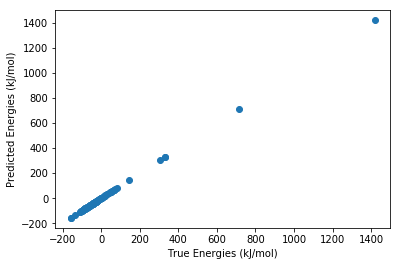

In [9]:
score = estimator.score(idx_train)
print("The RMSE is %s kJ/mol" % (str(score)) )

energies_predict = estimator.predict(idx_train)

plt.scatter(energies, energies_predict)
plt.xlabel("True Energies (kJ/mol)")
plt.ylabel("Predicted Energies (kJ/mol)")
plt.show()

#### 2. Loading representations

The second way to use the `ARMP` class is useful when you already have generated the representations. For example, if you have a file with the representations, the atom types and the energies, you can load the data into the `ARMP` estimator. Here we load 100 samples of a data set where a methane molecule reacts with a cyano radical. The cartesian coordinates have been transformed into the atomic SLATM representation already.

In [12]:
cwd = os.getcwd()
dir_name = cwd + "/../../../test/data/"
filename = "local_slatm_ch4cn_light.npz"
data = np.load(dir_name + filename)

representation = data["arr_0"]
zs = data["arr_1"]
energies = data["arr_2"]

estimator = ARMP(iterations=3000, learning_rate=0.075, l1_reg=0.0, l2_reg=0.0, scoring_function="rmse")

estimator.set_representations(representations=representation)
estimator.set_classes(zs)
estimator.set_properties(energies)

In the same way as we did before, now we can use indices to specify on which samples to train, predict and score the model. Again, since we only have loaded 100 samples, we will train and predict on the same sets.

The RMSE is 0.30888228285160746 kJ/mol


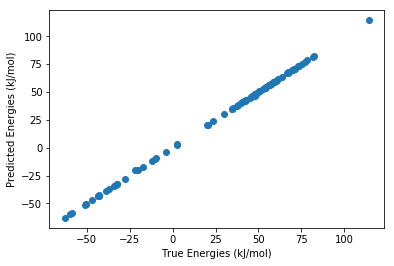

In [13]:
idx_train = np.arange(0,100)

estimator.fit(idx_train)

score = estimator.score(idx_train)

print("The RMSE is %s kJ/mol" % (str(score)) )

energies_predict = estimator.predict(idx_train)

plt.scatter(energies, energies_predict)
plt.xlabel("True Energies (kJ/mol)")
plt.ylabel("Predicted Energies (kJ/mol)")
plt.show()

#### 3. Passing representations straight to the fit function

In this case, there the data is not stored in the class before the fit function is called. Here the data is passed directly to the fit function. When using this way of fitting the estimator it is important to remember that the data that will be passed to the predict/score functions _must_ contain the same element types as the data that was used for the fitting.

The RMSE is 0.06417642021013359 kJ/mol


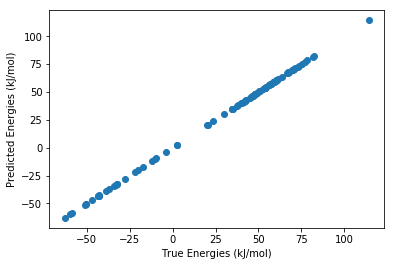

In [15]:
estimator = ARMP(iterations=3000, learning_rate=0.075, l1_reg=0.0, l2_reg=0.0, scoring_function="rmse")

estimator.fit(x=representation, y=energies, classes=zs)

score = estimator.score(x=representation, y=energies, classes=zs)

print("The RMSE is %s kJ/mol" % (str(score)) )

energies_predict = estimator.predict(x=representation, classes=zs)

plt.scatter(energies, energies_predict)
plt.xlabel("True Energies (kJ/mol)")
plt.ylabel("Predicted Energies (kJ/mol)")
plt.show()

### `MRMP` class

There are also three ways of using the `MRMP` class, which are the same as for the `ARMP` class. Therefore, only the second way is shown.

In this class there is no need to specify the nuclear charges for the estimator, because the neural network is not atom decomposed. The representation needs to have a shape `(n_samples, n_features)` instead of `(n_samples, n_atoms, n_features)` which was needed for the `ARMP` class.

In [ ]:
estimator = MRMP(iterations=100, l2_reg=0.0)

estimator.set_representations(representations=representation)
estimator.set_properties(energies)

Once the data is stored in the class, indices can be used to specify on which samples to train in the same way as for the `ARMP` class.